Imports

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from keras.models import Sequential
from keras import layers
from sklearn.svm import LinearSVC
from os import listdir
from os.path import isfile, join
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import string

Setup data for model

In [49]:
symb_keep = [" ", "!", "?", ".", ","]
str_fix = lambda str: "".join([char.lower() if char in list(string.ascii_letters)+symb_keep else "" for char in str]).replace("‚Äô", "'")
#str_fix = lambda str: str
with open('PA3_train.tsv', encoding="utf-8") as f: Y_train, X_train = zip(*[(int(line[0]), str_fix(line[4:])) for line in f.readlines() if (line[0] == line[2])])
with open('PA3_test.tsv', encoding="utf-8") as f: Y_test, X_test = zip(*[(int(line[0]), str_fix(line[2:])) for line in f.readlines()])

Function for displaying results

In [45]:
def disp_result(y_test, y_predict):
    print(accuracy_score(y_test, y_predict))
    print(classification_report(y_test, y_predict))
    mat = confusion_matrix(y_test, y_predict)
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, \
                cmap='coolwarm', linewidths=5)
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.show()

Run models and display results

0.9480296973158195
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       865
           1       0.95      0.94      0.95       886

    accuracy                           0.95      1751
   macro avg       0.95      0.95      0.95      1751
weighted avg       0.95      0.95      0.95      1751



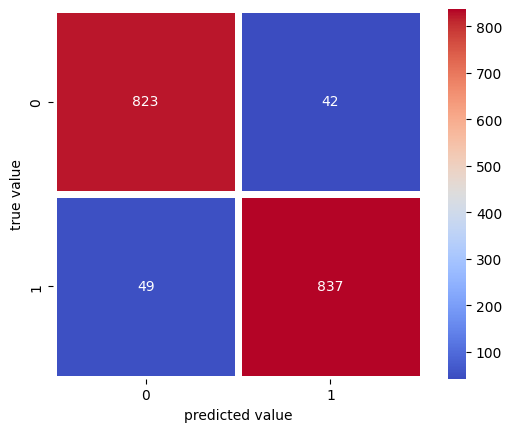

0.9623072529982867
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       865
           1       0.96      0.97      0.96       886

    accuracy                           0.96      1751
   macro avg       0.96      0.96      0.96      1751
weighted avg       0.96      0.96      0.96      1751



c:\Users\David\.pyenv\pyenv-win\versions\3.10.6\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


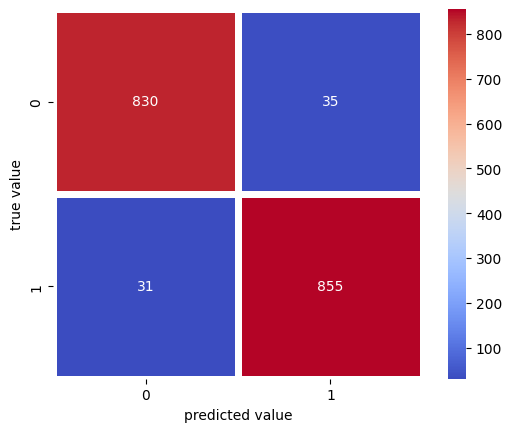

0.9520274129069103
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       865
           1       0.95      0.96      0.95       886

    accuracy                           0.95      1751
   macro avg       0.95      0.95      0.95      1751
weighted avg       0.95      0.95      0.95      1751



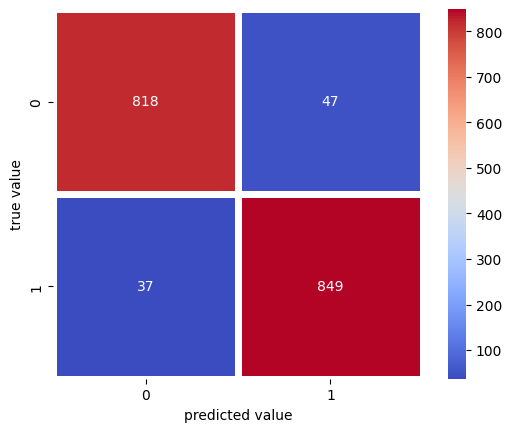

0.9594517418617933
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       865
           1       0.95      0.98      0.96       886

    accuracy                           0.96      1751
   macro avg       0.96      0.96      0.96      1751
weighted avg       0.96      0.96      0.96      1751



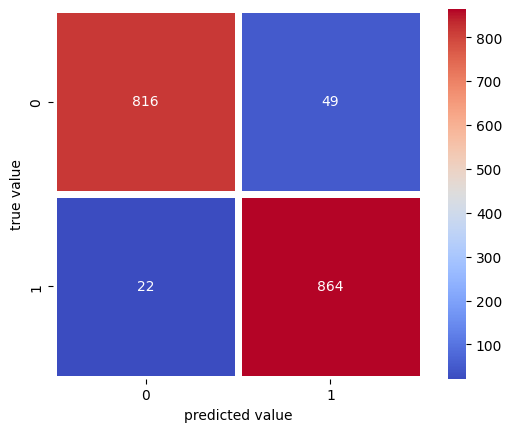

In [50]:
models = [MultinomialNB(), LogisticRegression(), LinearSVC(), SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=1337, max_iter=7, tol=None)]

vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
for model in models:
    model.fit(X_train_count, Y_train)
    y_predict = model.predict(vectorizer.transform(X_test))
    disp_result(Y_test, y_predict)

Deep Learning Comparison

In [48]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

#train_size = int(len(df) * .7)
max_words = 5000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(X_train) # only fit on train

x_train = tokenize.texts_to_matrix(X_train)
x_test = tokenize.texts_to_matrix(X_test)

encoder = LabelEncoder()
encoder.fit(Y_train)
y_train = encoder.transform(Y_train)
y_test = encoder.transform(Y_test)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 16
epochs = 10

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)


Epoch 1/10
373/373 [==============================] - 6s 15ms/step - loss: 0.1979 - accuracy: 0.9255 - val_loss: 0.0890 - val_accuracy: 0.9729
Epoch 2/10
373/373 [==============================] - 6s 16ms/step - loss: 0.0499 - accuracy: 0.9831 - val_loss: 0.0821 - val_accuracy: 0.9744
Epoch 3/10
373/373 [==============================] - 6s 16ms/step - loss: 0.0202 - accuracy: 0.9948 - val_loss: 0.1013 - val_accuracy: 0.9698
Epoch 4/10
373/373 [==============================] - 6s 16ms/step - loss: 0.0096 - accuracy: 0.9977 - val_loss: 0.1031 - val_accuracy: 0.9713
Epoch 5/10
373/373 [==============================] - 6s 16ms/step - loss: 0.0058 - accuracy: 0.9988 - val_loss: 0.1001 - val_accuracy: 0.9698
Epoch 6/10
373/373 [==============================] - 6s 16ms/step - loss: 0.0030 - accuracy: 0.9997 - val_loss: 0.1173 - val_accuracy: 0.9683
Epoch 7/10
373/373 [==============================] - 6s 16ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1281 - val_accuracy: 0.9698